### import requisite libraries

In [29]:
from sklearn.ensemble import RandomForestClassifier

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay, plot_confusion_matrix

import seaborn as sns
import matplotlib.pyplot as plt

from tqdm import tqdm
import json

### build modelling data
* load feature transformed data
* configure multiclass classification targets
* split into train and test set

In [13]:
df = pd.read_csv('../data/transformed_data.csv').drop(columns=['info'])

In [15]:
with open('target_mappings.json','r') as f:
    target_mapper = json.load(f)

In [17]:
if df['target'].dtype == 'O':
    df['target'] = df['target'].apply(target_mapper.get)

In [19]:
X_train, X_test, y_train, y_test = train_test_split(df.drop(columns='target'), df['target'], test_size=0.3)

In [3]:
#One vs All implementation
# ohe = OneHotEncoder()
# ohe.fit(df[['target']])
# targets = ohe.get_feature_names_out()
# df[targets] = ohe.transform(df[['target']]).toarray()
# df = df.drop(columns=['target'])
# X_train, X_test, Y_train, Y_test = train_test_split(df.drop(columns=targets), df[targets], test_size=0.3)

### train model

In [20]:
clf = RandomForestClassifier()
clf.fit(X_train, y_train)

RandomForestClassifier()

In [21]:
y_pred = clf.predict(X_test)

### build results

In [31]:
print(classification_report(y_test, y_pred))
# print(confusion_matrix(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00       614
           1       0.00      0.00      0.00       588
           2       0.98      0.24      0.39       597
           3       0.99      0.24      0.39       581
           4       0.99      0.66      0.79       614
           5       0.98      0.64      0.78       618
           6       1.00      1.00      1.00       608
           7       1.00      1.00      1.00       600
           8       1.00      1.00      1.00       601
           9       1.00      1.00      1.00       598
          10       0.00      0.00      0.00       618
          11       0.08      1.00      0.15       565
          12       0.98      0.25      0.39       634
          13       0.95      0.24      0.39       632
          14       0.98      0.76      0.85       621
          15       0.98      0.75      0.85       644
          16       0.97      0.24      0.38       621
          17       0.99    

c:\Users\Kai\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


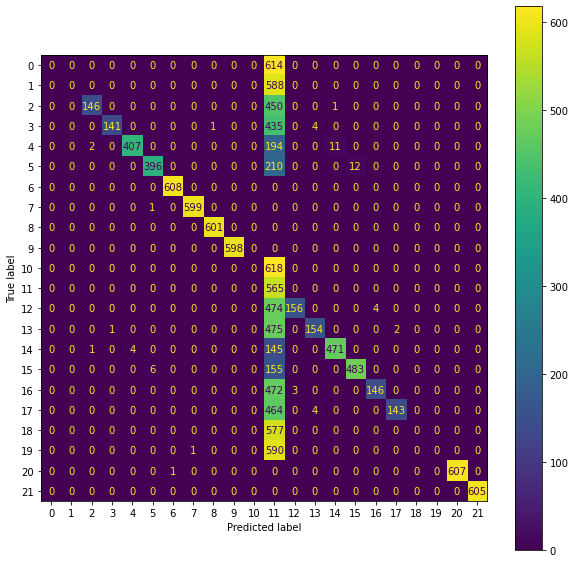

In [35]:
fig, ax = plt.subplots(figsize=(10, 10))
plot_confusion_matrix(clf, X_test, y_test, ax=ax)
plt.show()

<BarContainer object of 5 artists>

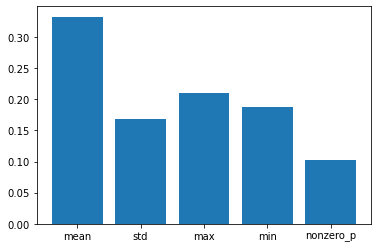

In [42]:
plt.bar(X_test.columns, clf.feature_importances_)

### plot the basic results